K Means Clustering - AI Training Software  
Copyright (C) 2024 AI Institute, University of South Carolina

Authors:    Homayoun Valafar
            Andrew Smith
            Christopher Lee
            Alireza Bagheri
            Musa Azim
         

This program is free software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, either version 3 of the License, or  
(at your option) any later version.  

This program is distributed in the hope that it will be useful,  
but WITHOUT ANY WARRANTY; without even the implied warranty of  
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the  
GNU General Public License for more details.  

You should have received a copy of the GNU General Public License  
along with this program. If not, see <https://www.gnu.org/licenses/>.  

For inquiries or permissions, contact: Dr. Valafar (homayoun@cse.sc.edu)


The following YouTube videos show how K Means Clustering works: 
- https://www.youtube.com/watch?v=5I3Ei69I40s

In [4]:
# This is a sample Python script.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
# Generate a synthetic dataset with easy separability
# X represents all the inputs to the model (e.g., age & height or blood pressure & cholesterol, etc.)
# X is also referred to as features or independent variables
# y represents the target variable (e.g., whether a person has a disease or not)
# y is also referred to as the label or dependent variable
X, y = make_classification(
    n_samples=10000,      # Total number of samples
    n_features=2,         # Number of features (dimensions)
    n_informative=1,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=5,         # Separation between the classes
    weights = [0.5, 0.5], # Can adjust balance of the data
    hypercube=True,
    random_state=42
)

print(X.shape)
print(y.shape)

/tmp/ipykernel_126260/2106802344.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='coolwarm', marker='o', edgecolor='k', s=70)


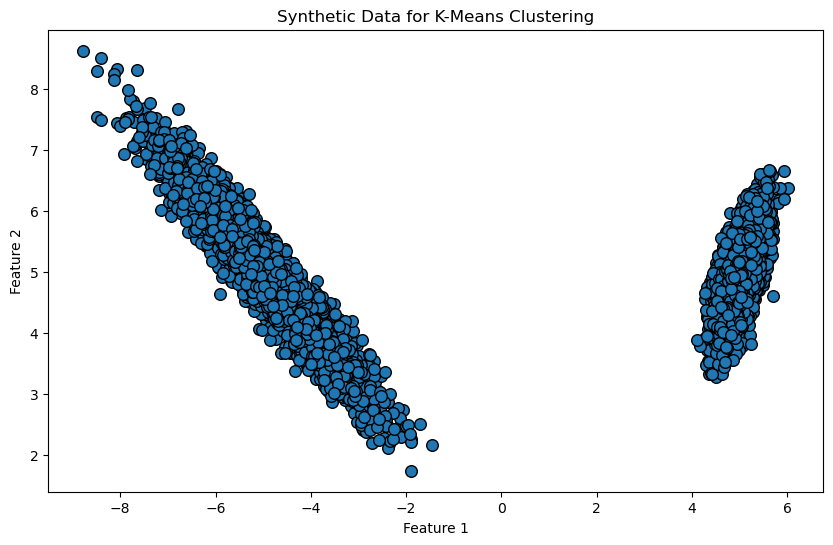

In [17]:
# Plot the generated dataset
plt.figure(figsize=(10, 6))
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolor='k', s=70)
plt.scatter(X[:, 0], X[:, 1], cmap='coolwarm', marker='o', edgecolor='k', s=70)
plt.title("Synthetic Data for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.legend()
plt.show()

11483.544471099916
<class 'numpy.ndarray'>


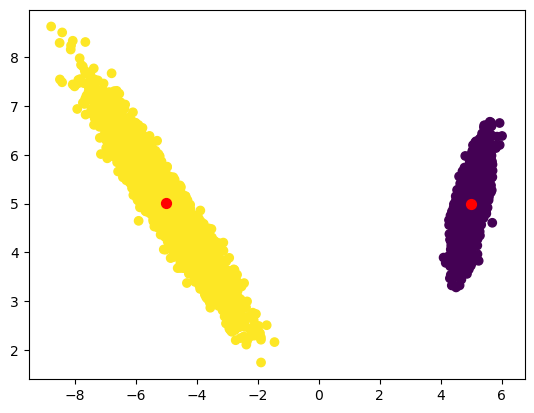

In [19]:
kmeans = KMeans(n_clusters=2, init='random', n_init=3, max_iter=100, tol=0.0001, verbose=0)
kmeans.fit(X)
print(kmeans.inertia_)
print(type(kmeans.labels_))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')


261571.48835822754
11483.544471099916
5313.786425179836
4400.29917786817
2980.0610249664373
2055.9689148077323
2361.1528376752967
1435.78341351435
1318.0465843328614
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[261571.48835822754, 11483.544471099916, 5313.786425179836, 4400.29917786817, 2980.0610249664373, 2055.9689148077323, 2361.1528376752967, 1435.78341351435, 1318.0465843328614]


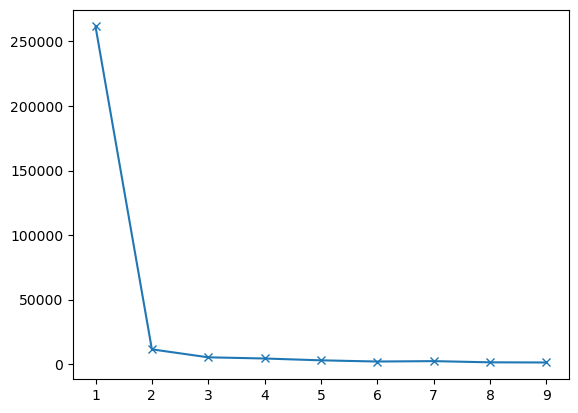

In [20]:
clusters = []
scores = []

for c in range(1, 10, 1):
    kmeans = KMeans(n_clusters=c, init='random', n_init=4, max_iter=100, tol=0.0001, verbose=0)
    kmeans.fit(X)
    clusters.append(c)
    scores.append(kmeans.inertia_)
    print(kmeans.inertia_)
    # print(type(kmeans.labels_))
    # plt.scatter(myData[:,0], myData[:,1], c=kmeans.labels_)
    # plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
print(clusters)
print(scores)
plt.plot(clusters, scores, marker='x')
plt.show()
